# BRAZIL HOUSING

IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

READING THE FILE

In [2]:
df=pd.read_csv('DATA1.csv')
#df

NO.OF ROWS AND COLUMNS 

In [3]:
df.shape

(10692, 13)

COLUMNS NAME

In [4]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

DATASET INFORMATION

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


CHECKING FOR NULL VALUES

In [6]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

SEPARATING CATEGORICAL AND CONTINUOUS VARIABLES

In [7]:
def separate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 10:       # nunique:  returns unique values in the column,
                                                    #here 10 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = separate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


USER DEFINED FUNCTIONS:-

FOR CATEGORICAL:-

In [8]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe    

FOR CONTINUOUS:-

In [9]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")

OUTLIER ANALYSIS FOR CONTINUOUS VARIABLES:-

In [10]:
print('ROWS AND COLUMNS BEFORE REMOVING OUTLIERS:',df.shape)
def myoutliers(df,col):
    
    Q1=np.quantile(df[col],0.25)
    Q3=np.quantile(df[col],0.75)
    
    IQR=Q3-Q1
    
    global mylist
    global my_outlier_df
    
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    
    print('LOWER RANGE OF',col,'IS',LF)
    print('UPPER RANGE OF',col,'IS',UF)
    
    mylist=[x for x in df[col] if((x<LF) | (x>UF))]
    print('TOTAL OUTLIERS IN',col,'ARE',len(mylist))
    my_outlier_df=df.loc[df[col].isin(mylist)]
    
k=['area', 'rooms', 'bathroom', 'parking spaces', 'floor','hoa (R$)', 'rent amount (R$)','property tax (R$)', 'fire insurance (R$)', 'total (R$)']

for i in k:
    print('I is', i)
    myoutliers(df, i)
    Index=my_outlier_df.index
    df=df.drop(Index)
    print("************************************")
print('ROWS AND COLUMNS AFTER REMOVING OUTLIERS:',df.shape)
print()

ROWS AND COLUMNS BEFORE REMOVING OUTLIERS: (10692, 13)
I is area
LOWER RANGE OF area IS -133.0
UPPER RANGE OF area IS 371.0
TOTAL OUTLIERS IN area ARE 672
************************************
I is rooms
LOWER RANGE OF rooms IS 0.5
UPPER RANGE OF rooms IS 4.5
TOTAL OUTLIERS IN rooms ARE 201
************************************
I is bathroom
LOWER RANGE OF bathroom IS -2.0
UPPER RANGE OF bathroom IS 6.0
TOTAL OUTLIERS IN bathroom ARE 12
************************************
I is parking spaces
LOWER RANGE OF parking spaces IS -3.0
UPPER RANGE OF parking spaces IS 5.0
TOTAL OUTLIERS IN parking spaces ARE 110
************************************
I is floor
LOWER RANGE OF floor IS -9.5
UPPER RANGE OF floor IS 18.5
TOTAL OUTLIERS IN floor ARE 255
************************************
I is hoa (R$)
LOWER RANGE OF hoa (R$) IS -1175.0
UPPER RANGE OF hoa (R$) IS 2625.0
TOTAL OUTLIERS IN hoa (R$) ARE 579
************************************
I is rent amount (R$)
LOWER RANGE OF rent amount (R$) IS -

FOR CALCULATING PERCENTAGE IN COUNT PLOTS

In [11]:
def bar_percentage(ax, count: "number of rows in data "):
    L=[]
    for bar in ax.patches:                                            # ax.patches returns the rectange object from matplotlib
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  # first it calculate the bar height and then dividing by the number of row(to calculate percentage)
                                                                            # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.
        x = bar.get_x() + bar.get_width() /2                          # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
        y = bar.get_height()                                          # get_height: returns height of rectangle bar.
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") # va: Vertical axis: -> top means percentage would bneath the bar head. top, bottom or center 
        #print(y)
        L.append(y)          # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right.
    S=np.array(L)
    n=int(len(S)/2)
    R=np.reshape(S,(2,n)).T
    [H,I]=np.hsplit(R,2)                                     # annotate: used to annotate over objects. here objects are the bars 
    plt.show()
    print('RATE:')
    Ans=(I/(H+I)*100).T
    print(Ans)

In [12]:
def bar_percent(ax, count: "number of rows in data "):
    L=[]
    for bar in ax.patches:                                            # ax.patches returns the rectange object from matplotlib
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  # first it calculate the bar height and then dividing by the number of row(to calculate percentage)
                                                                            # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.
        x = bar.get_x() + bar.get_width() /2                          # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
        y = bar.get_height()                                          # get_height: returns height of rectangle bar.
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") # va: Vertical axis: -> top means percentage would bneath the bar head. top, bottom or center 
        #print(y)
        L.append(y)          # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right.
    S=np.array(L)
    n=int(len(S)/2)
    R=np.reshape(S,(2,n)).T
    [H,I]=np.hsplit(R,2)                                     # annotate: used to annotate over objects. here objects are the bars 
    plt.show()
    print('RATE:')
    Ans=(H/(H+I)*100).T
    print(Ans)

In [13]:
data=df[(df.city!='São Paulo')&(df.city!='Rio de Janeiro')]
data.shape

(2653, 13)

# 1)ANALYSIS BASED ON BUDGET 

In [14]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is São Paulo
Number of missing values in city is 0


In [15]:
data['total (R$)'].describe()

count    2653.000000
mean     2332.361478
std      1240.235073
min       499.000000
25%      1389.000000
50%      1958.000000
75%      3033.000000
max      7012.000000
Name: total (R$), dtype: float64

In [16]:
#filtering total rent less than average
d1=data[data['total (R$)']<=2332.361]
d1.shape

(1624, 13)

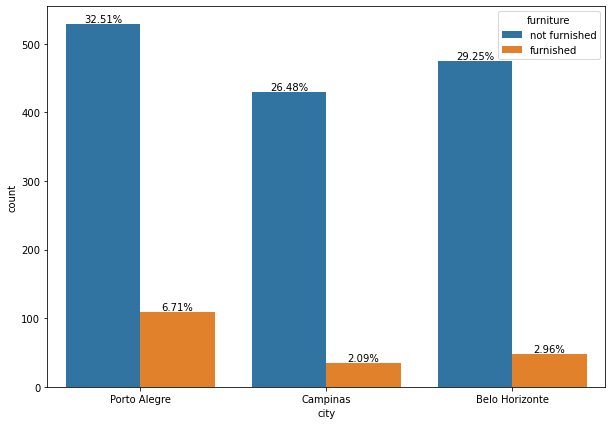

RATE:
[[17.11145997  7.32758621  9.17782027]]


In [17]:
#FURNITURE FIELD
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "furniture", data = d1)
bar_percentage(ax, len(d1)) 
plt.show()

Porto Alegre has more number of furnished houses

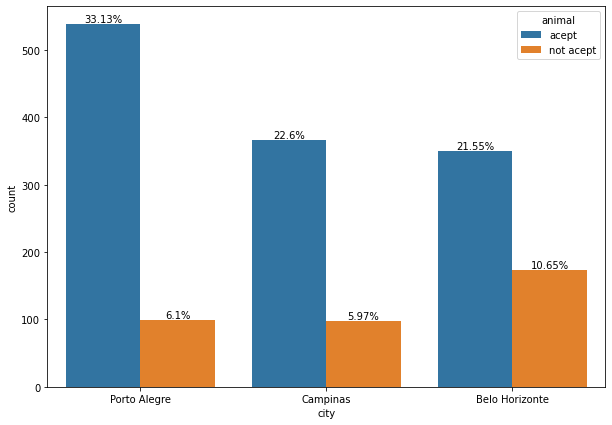

RATE:
[[84.45839874 79.09482759 66.92160612]]


In [18]:
#ANIMAL FIELD
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "animal", data = d1)
bar_percent(ax, len(d1)) 
plt.show()

Porto Alegre animal acceptance rate is high

In [19]:
d2=d1['rooms'].groupby(d1['city']).value_counts().rename('Total_no_of_rooms').reset_index()
d2

,city,rooms,Total_no_of_rooms
0,Belo Horizonte,2,226
1,Belo Horizonte,3,174
2,Belo Horizonte,1,113
3,Belo Horizonte,4,10
4,Campinas,2,202
5,Campinas,1,176
6,Campinas,3,83
7,Campinas,4,3
8,Porto Alegre,2,291
9,Porto Alegre,1,276


Porto Alegre is providing more options for houses with rooms 1,2

CONCLUSION:-
    The person who are preferring 1 to 2 rooms and has pet with less than or equal to average budget of $2332 can relocate to Porto Alegre

# 2)ANALYSIS BASED ON FLOOR

In [38]:
data['floor'].describe()

count    2653.000000
mean        3.906144
std         3.719604
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        18.000000
Name: floor, dtype: float64

In [39]:
#filtering data above 75% based on floor
d3=data[data.floor>=5]
d3.shape

(801, 13)

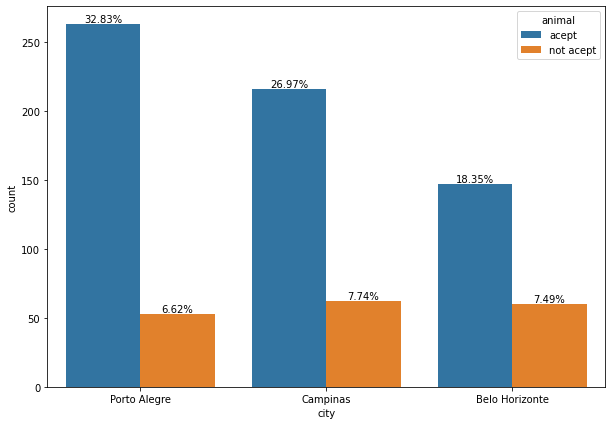

RATE:
[[83.2278481  77.69784173 71.01449275]]


In [40]:
#ANIMAL FIELD
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "animal", data = d3)
bar_percent(ax, len(d3)) 
plt.show()

Porto Alegre animal acceptance rate is high

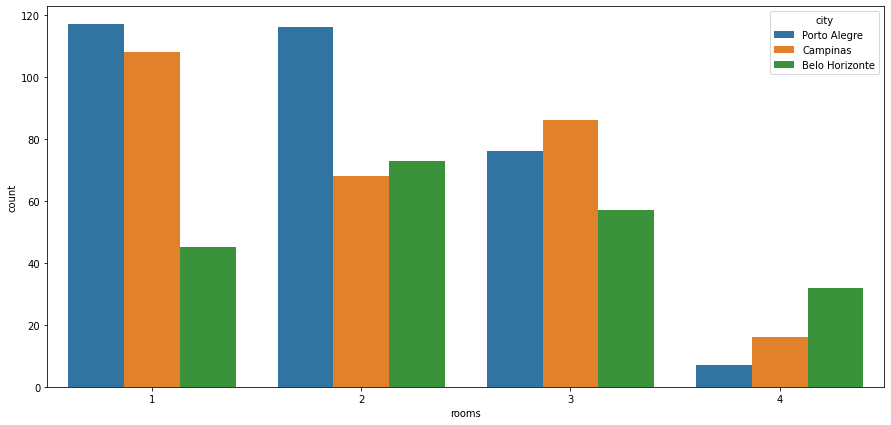

In [41]:
#ROOMS FIELD
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot(x = d3["rooms"] ,hue = d3["city"] , ax=ax)
plt.show()

Porto alegre has 1,2 rooms high in number

In [42]:
#Maximum AREA FOR CITIES:
a1=d3.groupby(d3['city'])['area'].max()
a1

city
Belo Horizonte    358
Campinas          292
Porto Alegre      340
Name: area, dtype: int64

CONCLUSION:-The person who wishes to live in high floor buildings can choose Porto alegre if they have pet and want 1 or 2 rooms while maximum area is small comparing to Belo horizonto

# 3)ANALYSIS BASED ON AREA

In [43]:
data['area'].describe()

count    2653.00000
mean       87.19412
std        56.34842
min        15.00000
25%        50.00000
50%        70.00000
75%       100.00000
max       367.00000
Name: area, dtype: float64

In [44]:
#filtering area above 75%
d4=data[data.area>=100]
d4.shape

(733, 13)

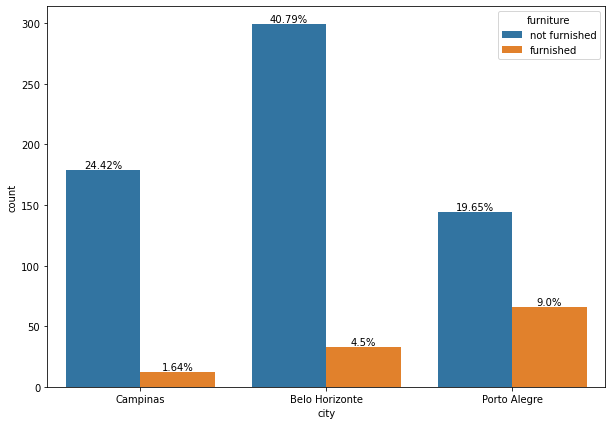

RATE:
[[93.71727749 90.06024096 68.57142857]]


In [45]:
#FURNITURE FIELD
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "furniture", data = d4)
bar_percent(ax, len(d4)) 
plt.show()

Porto alegre has less furnished house,where the area is large

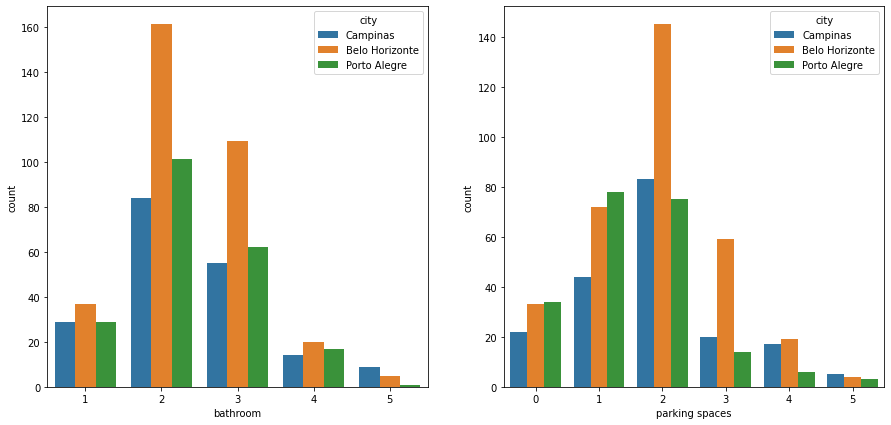

In [46]:
#bathroom & parking spaces field
fig, ax = plt.subplots(1,2,figsize = (15, 7))
sns.countplot(x = d4["bathroom"] ,hue = d4["city"] , ax=ax[0])
sns.countplot(x = d4["parking spaces"] ,hue = d4["city"] , ax=ax[1])
plt.show()

You can choose Belo horizonte for parking spaces >2 and bathrooms <=4

CONCLUSION:-The person who wishes to have area of 100 and above ,then can choose Belo horizonto for furnished house and for parking spaces >2 and bathrooms <=4

# 4)ANALYSIS BASED ON ROOM

In [48]:
data['rooms'].describe()

count    2653.000000
mean        2.182058
std         0.926212
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: rooms, dtype: float64

In [49]:
#filtering room based on 75% data
d5=data[data.rooms>3]
d5.shape

(213, 13)

In [50]:
#AVERAGE AREA FOR CITIES:
a2=d5.groupby(d5['city'])['area'].mean()
a2

city
Belo Horizonte    182.000000
Campinas          188.604651
Porto Alegre      181.766667
Name: area, dtype: float64

In [51]:
#AVERAGE total Rent FOR CITIES:
a3=d5.groupby(d5['city'])['total (R$)'].mean()
a3

city
Belo Horizonte    4134.100000
Campinas          4232.116279
Porto Alegre      3709.266667
Name: total (R$), dtype: float64

In [52]:
a3/a2

city
Belo Horizonte    22.714835
Campinas          22.439088
Porto Alegre      20.406749
dtype: float64

 Porto alegre has high average area with low total amount 

# 5)ANALYSIS BASED ON FURNISHED HOUSES

In [55]:
d6=data[data.furniture=='furnished']
d6.shape

(470, 13)

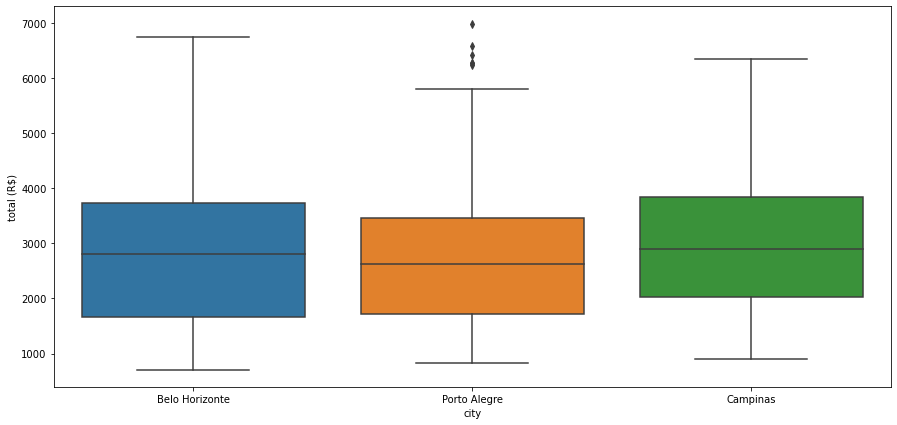

In [56]:
#TOTAL RENT 
fig, ax = plt.subplots(figsize = (15, 7))
sns.boxplot(x = d6["city"] ,y = d6["total (R$)"] , ax=ax)
plt.show()

Porto alegre has 50 % total rent in the range  of 1800 to 3700

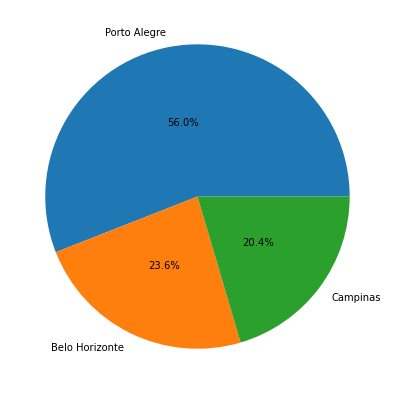

In [57]:
#CITY WISE HOUSE COUNT 
fig, ax = plt.subplots(figsize = (15, 7))
d= d6["city"].value_counts()                                                                                                     #in gender columns
labels =d.keys()                                                 
plt.pie(x = d, autopct = "%.1f%%", labels = labels, pctdistance = 0.5)  
plt.show()

Porto Alegre has more no.of furnished houses 

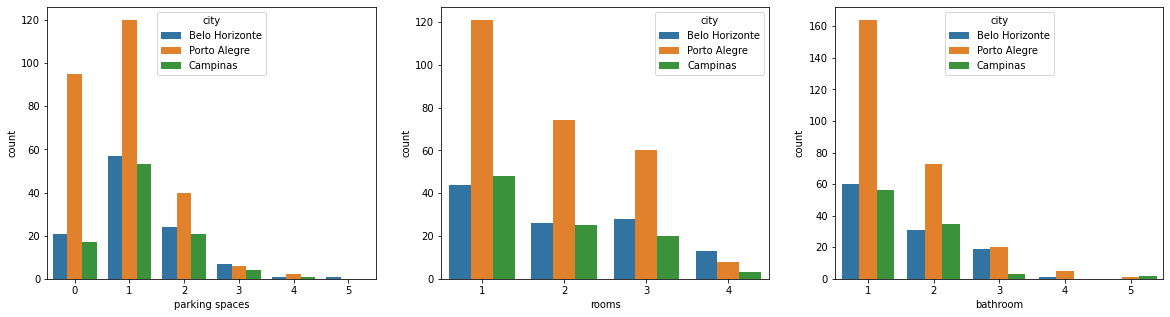

In [58]:
#Parking spaces & rooms & bathrooms field
fig, ax = plt.subplots(1,3,figsize = (20, 5))
sns.countplot(x = d6["parking spaces"] ,hue = d6["city"] , ax=ax[0])
sns.countplot(x = d6["rooms"] ,hue = d6["city"] , ax=ax[1])
sns.countplot(x = d6["bathroom"] ,hue = d6["city"] , ax=ax[2])
plt.savefig("Graph.jpg")
plt.show()

 You can choose Porto algere city if you prefer for <= 2- parking spaces, <=4 - bathroom,<=3 -rooms and maximum furnished house

# OVERALL CONCLUSION:-

Porto Alegre is best city for relocation interms of:-

    It has Furnished houses of 56% from total 3 cities
    
    For <= 2- parking spaces, <=4 - bathroom ,<=3 - rooms
    
    For having pets
    
    50% houses-Total rent range 1800 to 3700
    
    Reasonable total rent price for the area
    
    Budget friendly(especially who prefer 1 or 2 rooms)
    
    To live in high floors
    
    But,the maximum area in this city is small comparing to Belo horizonto
    
    

Belo horizonto is best city for relocation interms of:-
    
    for > 2- parking spaces, > 4 - bathroom , > 3 - room
    
    More furnished house in large living areas
    
    Maximum living area comparing to Porto Alegre
    
    